<a href="https://colab.research.google.com/github/AndresBanquezBio/Biosenales/blob/main/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

scipy.signal.firwin(orden+1, wn, pass_zero,windows)
Siendo wn la frecuencia de corte que la definiremos como F/Nyquist.

Nyquist = Fs/2

pass_zero es el tipo de filtro

la ventana es window, "hann"

aplico el filtro con signal.filtfilt(b = filtro, a = 1, x=y_e)

**4.1.** Creación de la señal

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0 ≤ 𝑛 ≤ 1000 , 𝐹0 = 0,01𝐻𝑧 y 𝐹𝑠 = 25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico.

Text(0, 0.5, 'x_e(n)')

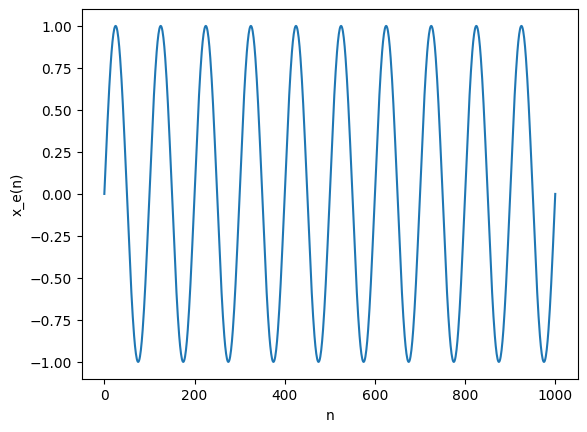

In [161]:
n = np.linspace(0, 1000, 1001)
F0 = 0.01
Fs = 25
def generateX(n, D):
  x_e = np.sin(2*np.pi*F0*(n - D))
  return x_e
x_e = generateX(n, 0)
plt.figure()
plt.plot(n, x_e)
plt.xlabel('n')
plt.ylabel('x_e(n)')

El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera
una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

𝑦𝑒(𝑛) = 𝛼𝑥𝑒(n)(𝑛 − 𝐷) + 𝑤(n)

In [162]:
w = np.random.normal(0, np.sqrt(0.01), len(n))
x_e = generateX(n, 15)
y_e = 0.8*x_e + w

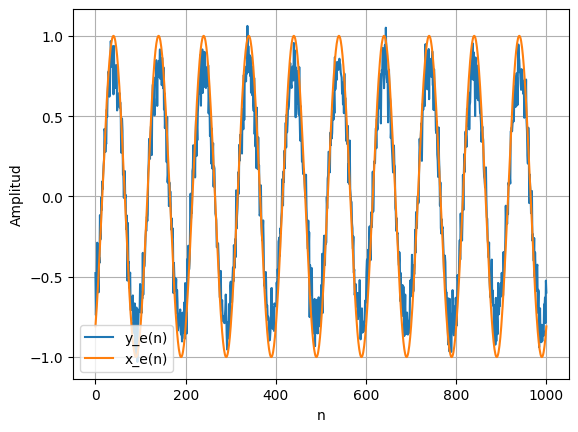

In [163]:
plt.figure()
plt.plot(n, y_e)
plt.plot(n, x_e)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend(['y_e(n)', 'x_e(n)'])
plt.grid()
plt.show()

**4.2.** Diseño de un filtro

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

* Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de cortede 1.25 muestras/s y orden 30.


In [164]:
fc = 1.25
fs = 25
nyquist = fs/2

wn1 = fc/nyquist
orden = 30

In [165]:
lowpass = signal.firwin(orden+1, wn1, pass_zero = 'lowpass', window = 'hamming')

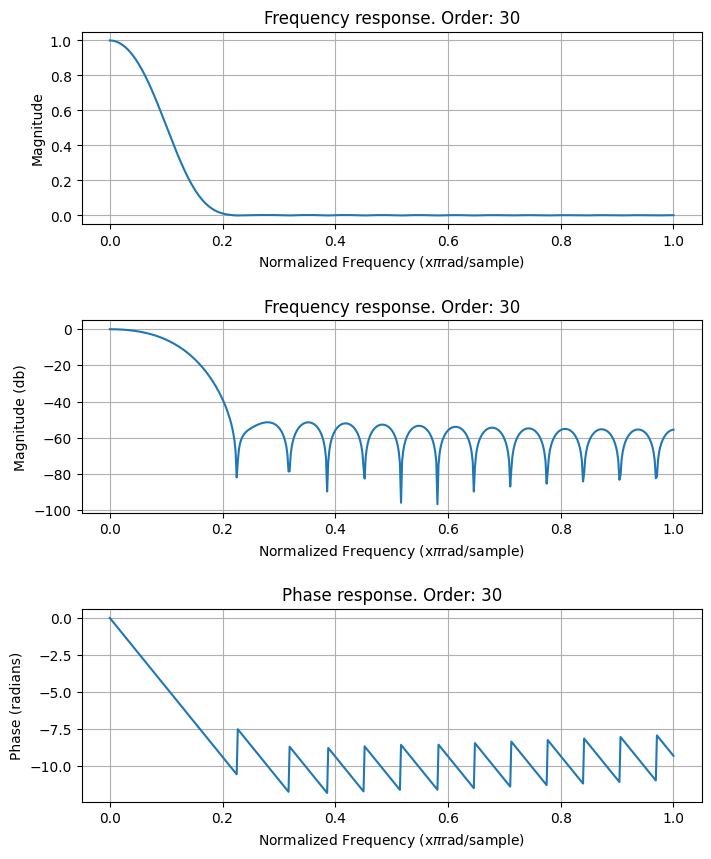

In [166]:
mfreqz(b = lowpass, a = 1, order = orden)

* ¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)


Se cambiaria el argumento pass_zero de lowpass a highpass para pasa altas y bandpass para pasabandas.

In [167]:
fc = 7.5

wn2 = fc/nyquist
orden = 30

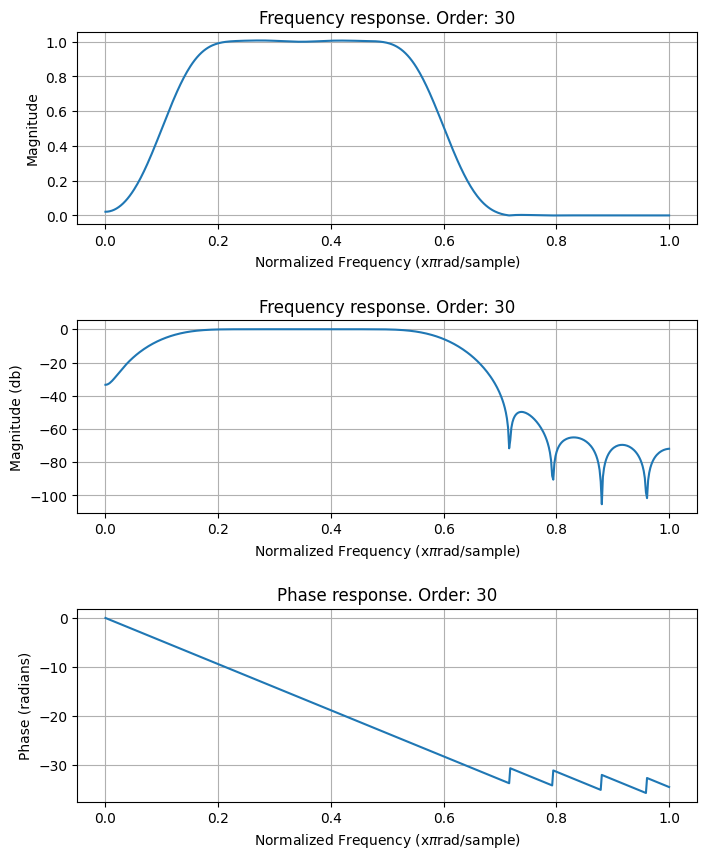

In [168]:
bandpass = signal.firwin(orden+1, [wn1, wn2], pass_zero = 'bandpass', window = 'hamming')
mfreqz(b = bandpass, a = 1, order = orden)

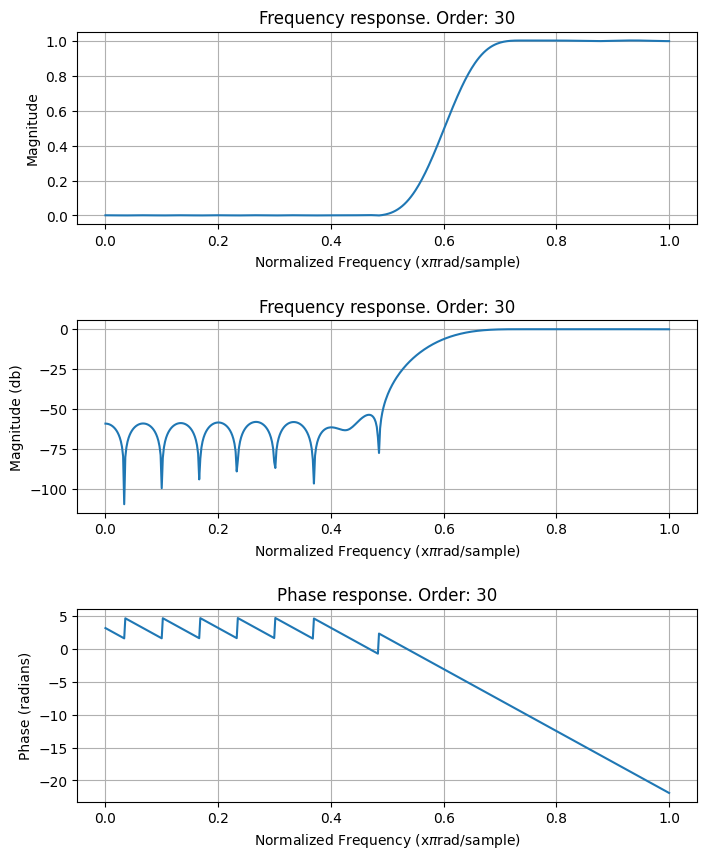

In [169]:
highpass = signal.firwin(orden+1, wn2, pass_zero = 'highpass', window = 'hamming')
mfreqz(b = highpass, a = 1, order = orden)

La función iirfilter permite diseñar un filtro IIR.

* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Comparecambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

In [170]:
orden = 5 # Para los iir requieren un orden menor.

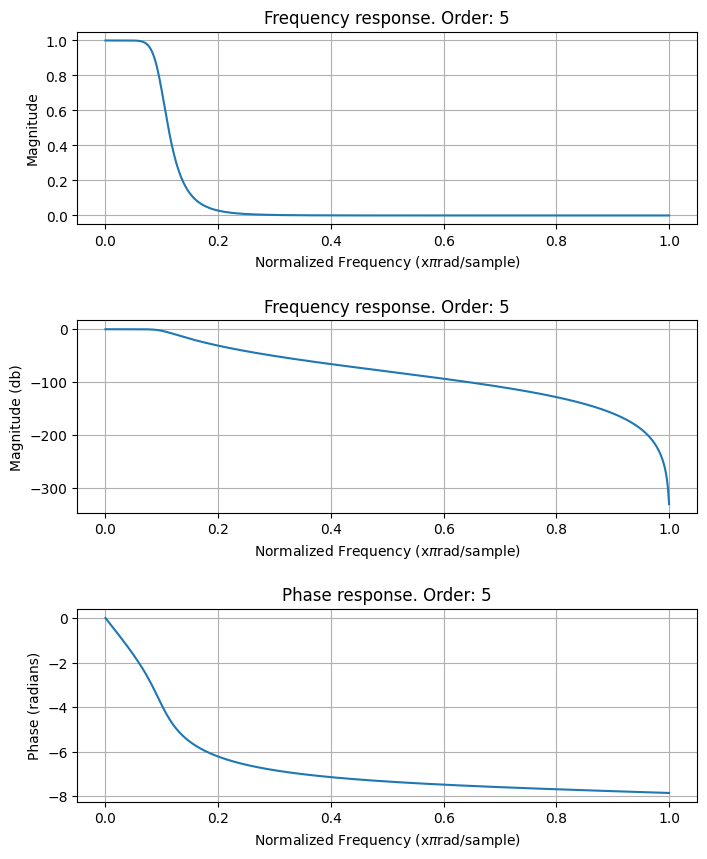

In [171]:
b, a = signal.iirfilter(orden, wn1, btype = 'lowpass')
mfreqz(b, a, order = orden)

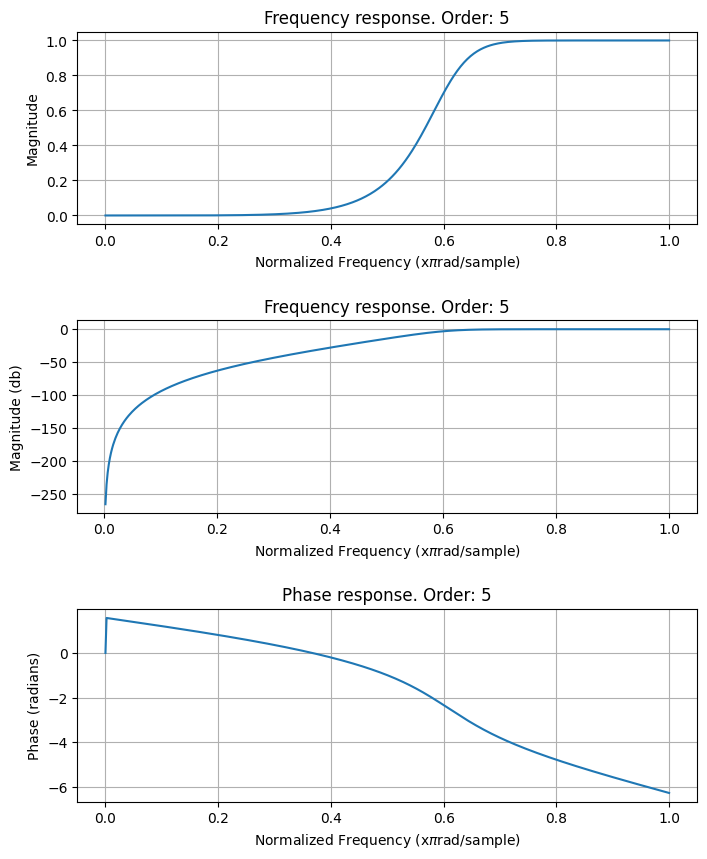

In [172]:
highpass_iir = signal.iirfilter(orden, wn2, btype = 'highpass')
mfreqz(highpass_iir[0], highpass_iir[1], order = orden)

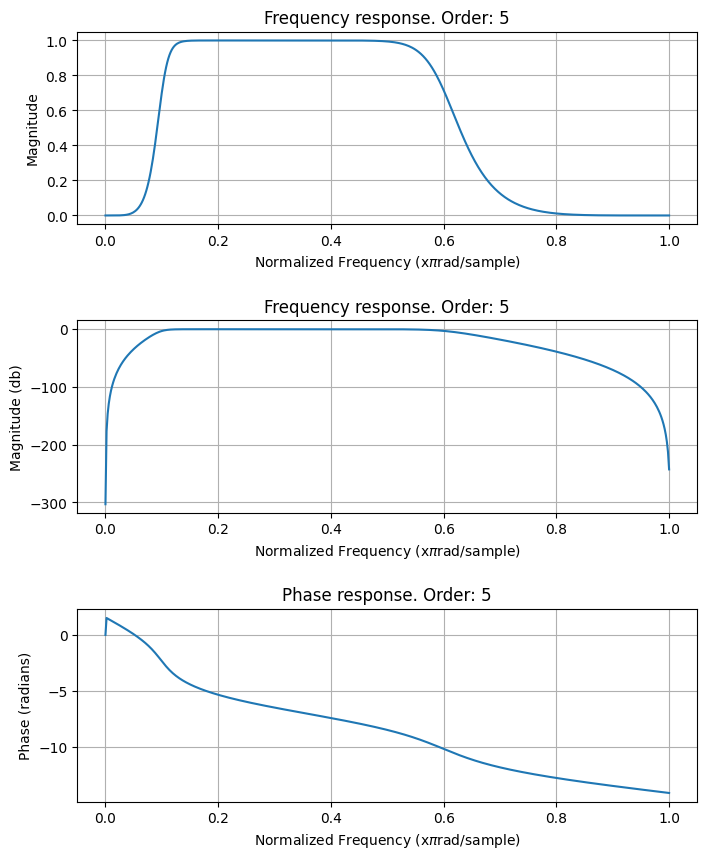

In [173]:
bandpass_iir = signal.iirfilter(orden, [wn1, wn2], btype = 'bandpass')
mfreqz(bandpass_iir[0], bandpass_iir[1], order = orden)

**4.3.** Filtrado
Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

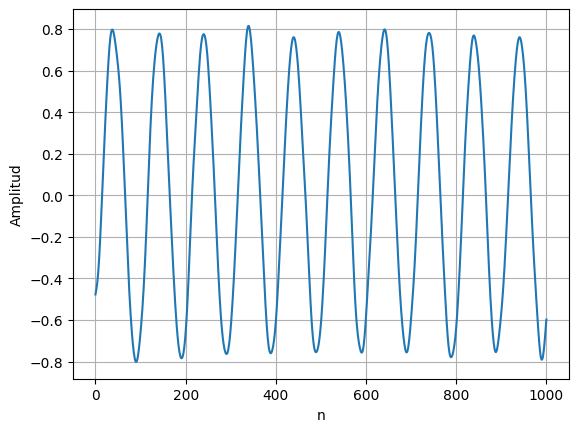

In [174]:
filtered_y = signal.filtfilt(b = lowpass, a = 1, x=y_e)
plt.figure()
plt.plot(n, filtered_y)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice

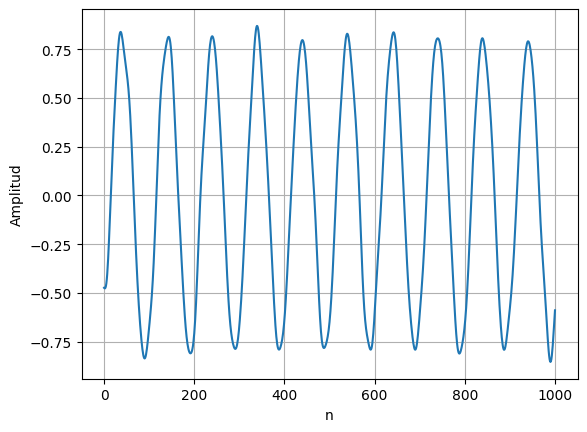

In [175]:
iir_y = signal.filtfilt(b = b, a = a, x=y_e)
plt.figure()
plt.plot(n, iir_y)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

**4.4** Aplicación
Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.


In [177]:
file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)
file.head()

canal1 = file[0]

* Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.
* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.
* Grafique un segmento de las señales antes y después de filtrar, analice los
cambios

ORDEN DE FILTRO = ΔF/(Δf/Fs)